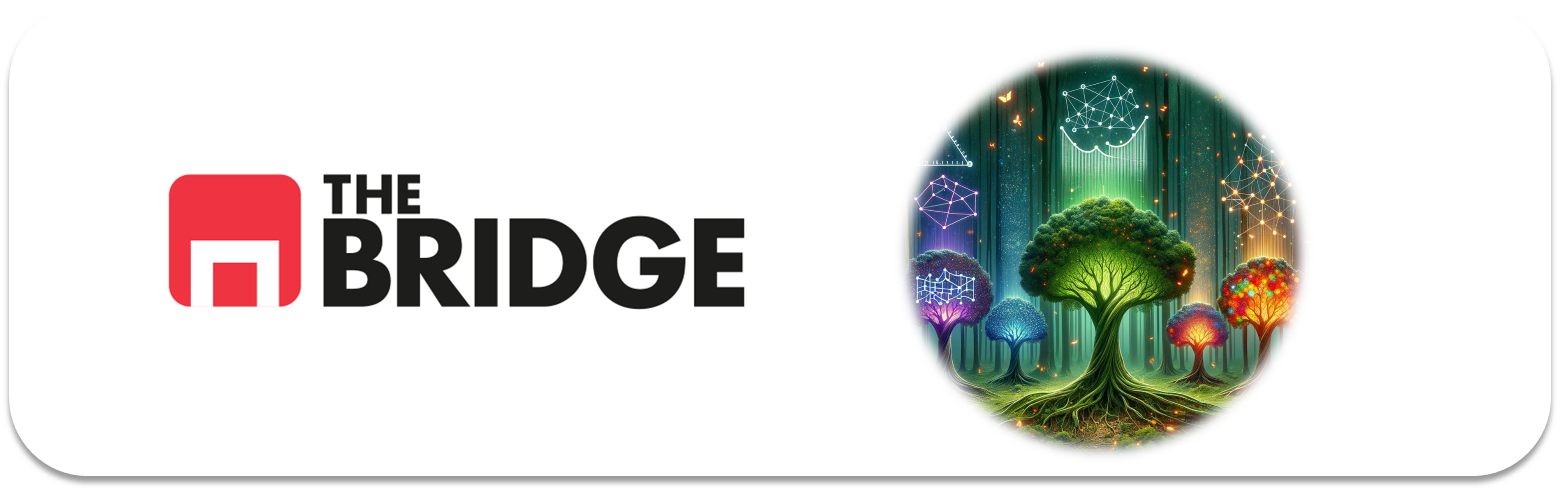

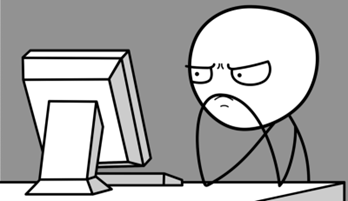

Para ejercitarte y afianzar lo aprendido sobre **Regresion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

Este conjunto de ejercicios trabajan sobre un dataset de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average



In [61]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# División de datos y preprocesamiento
from sklearn.model_selection import train_test_split

# Modelos
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [71]:
import pandas as pd

# Ruta del archivo
ruta = r"C:\Users\hp\Desktop\Python Scripts\temps.csv"

# Cargar el archivo especificando el delimitador correcto (;)
df = pd.read_csv(ruta, sep=';')

# Mostrar las primeras filas para confirmar la correcta carga
print("Primeras filas del DataFrame:")
print(df.head())

# Información general del DataFrame
print("\nInformación general del DataFrame:")
print(df.info())


Primeras filas del DataFrame:
   year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41  

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [7]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# División de datos y preprocesamiento
from sklearn.model_selection import train_test_split

# Modelos
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluación
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuración general
sns.set(style="whitegrid")  # Estilo de gráficos
plt.rcParams["figure.figsize"] = (10, 6)  # Tamaño por defecto de los gráficos



### Ejercicio 1

Importa el csv "temps.csv"

### Ejercicio 2

Haz un one-hot encoding de las variables categóricas del dataset

In [49]:
import pandas as pd

# Confirmar que la columna categórica existe en el DataFrame
print("Columnas del DataFrame:", df.columns)

# Asegurarse de que la columna 'week' sea categórica
if 'week' in df.columns:
    # Realizar el One-Hot Encoding
    df_encoded = pd.get_dummies(df, columns=['week'], drop_first=True)

    # Mostrar las primeras filas del DataFrame transformado
    print("Primeras filas del DataFrame con One-Hot Encoding:")
    print(df_encoded.head())

    # Mostrar las nuevas columnas creadas
    print("Nuevas columnas tras el One-Hot Encoding:", df_encoded.columns)
else:
    print("La columna 'week' no está presente en el DataFrame.")


Columnas del DataFrame: Index(['"year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average',
       'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend"'],
      dtype='object')
Primeras filas del DataFrame con One-Hot Encoding:
   "year month day temp_2 temp_1 average actual forecast_noaa forecast_acc  \
0  "2016     1   1     45     45    45.6     45            43           50   
1  "2016     1   2     44     45    45.7     44            41           50   
2  "2016     1   3     45     44    45.8     41            43           46   
3  "2016     1   4     44     41    45.9     40            44           48   
4  "2016     1   5     41     40      46     44            46           46   

  forecast_under friend"  week_Mon  week_Sat  week_Sun  week_Thurs  week_Tues  \
0             44     29"     False     False     False       False      False   
1             44     61"     False      True     False       False      False   
2             47     56"     False     F

### Ejercicio 2

Haz un one-hot encoding de las variables categóricas del dataset

In [72]:
if 'week' in df.columns:
    df = pd.get_dummies(df, columns=['week'], drop_first=True)
print("\nColumnas después del One-Hot Encoding:")
print(df.columns)





Columnas después del One-Hot Encoding:
Index(['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'week_Mon',
       'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues', 'week_Wed'],
      dtype='object')


In [ ]:
### Ejercicio 3

Divide en train y test

In [73]:
X = df.drop('actual', axis=1)  # Variables independientes
y = df['actual']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Ejercicio 4

Instancia un DecisionTreeRegressor de sklearn con hiperparámetros por defecto y entrénalo.

In [74]:
modelo = DecisionTreeRegressor(random_state=42)
modelo.fit(X_train, y_train)
print("\nModelo entrenado con hiperparámetros por defecto.")


Modelo entrenado con hiperparámetros por defecto.


### Ejercicio 5

Calcula su MAE sin usar sklearn.

In [75]:
y_pred = modelo.predict(X_test)
mae = np.mean(np.abs(y_test.values - y_pred))
print(f"\nMean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 5.21


### Ejercicio 6

Calcula su MAPE sin usar sklearn

In [76]:
mape = np.mean(np.abs((y_test.values - y_pred) / y_test.values)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 8.19%


### Ejercicio 7

Representa el árbol de decision

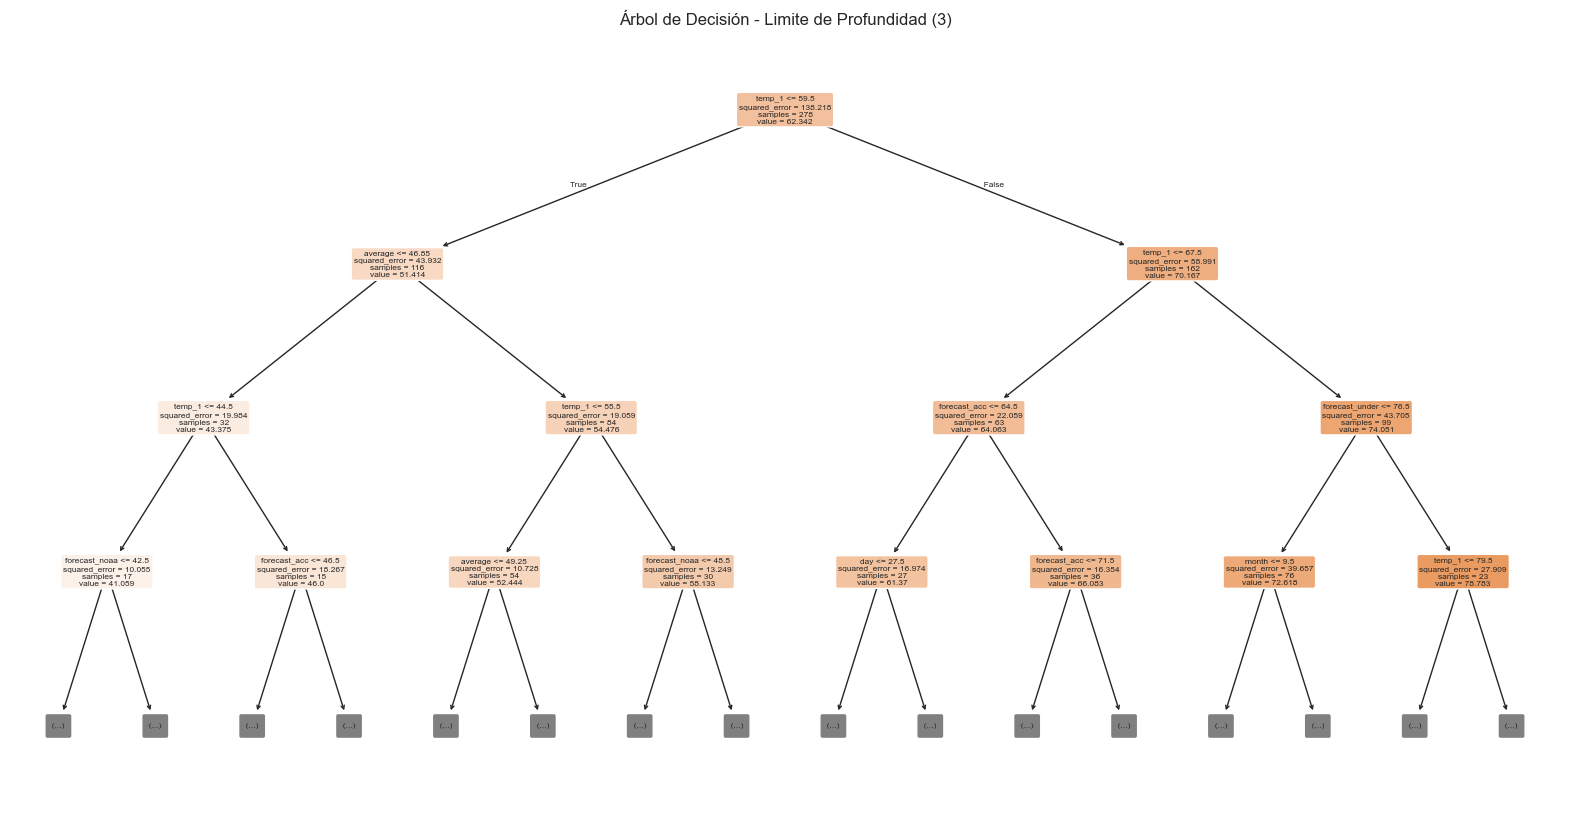

In [84]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    modelo, 
    feature_names=X.columns, 
    filled=True, 
    rounded=True, 
    max_depth=3  # Limita la profundidad para una visualización más clara
)
plt.title("Árbol de Decisión - Limite de Profundidad (3)")
plt.show()


### Ejercicio 8. 

Instancia un nuevo árbol ahora con max_depth a 3 y vuelve a entrenarlo

In [78]:
modelo_depth3 = DecisionTreeRegressor(max_depth=3, random_state=42)
modelo_depth3.fit(X_train, y_train)
print("\nModelo entrenado con max_depth=3.")


Modelo entrenado con max_depth=3.


### Ejercicio 9

Vuelve a calcular MAE y MAPE

In [80]:
y_pred_depth3 = modelo_depth3.predict(X_test)
mae_depth3 = np.mean(np.abs(y_test.values - y_pred_depth3))
mape_depth3 = np.mean(np.abs((y_test.values - y_pred_depth3) / y_test.values)) * 100

print(f"\nMean Absolute Error (MAE) con max_depth=3: {mae_depth3:.2f}")
print(f"Mean Absolute Percentage Error (MAPE) con max_depth=3: {mape_depth3:.2f}%")



Mean Absolute Error (MAE) con max_depth=3: 4.42
Mean Absolute Percentage Error (MAPE) con max_depth=3: 6.94%


### Ejercicio 10

Vuelve a representar su árbol

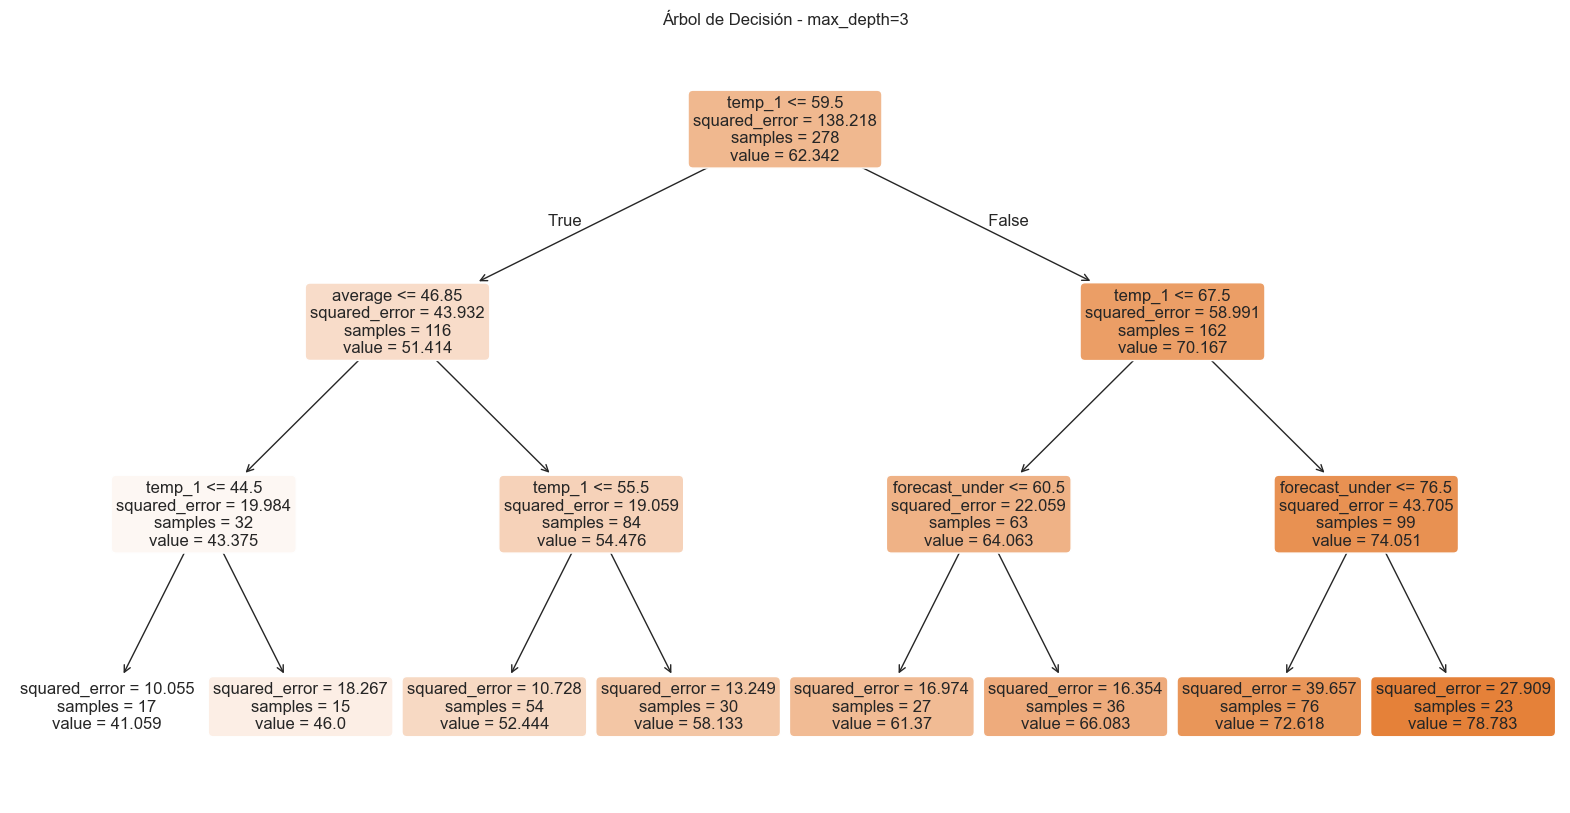

In [85]:
plt.figure(figsize=(20, 10))
plot_tree(modelo_depth3, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árbol de Decisión - max_depth=3")
plt.show()

### Ejercicio 11

Obten el `feature_importances` de cada variable en el último modelo. Los árboles una vez entrenados tienen un atributo que te lo permite, revisa la documentación si es necesario.

In [82]:
importances = modelo_depth3.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("\nImportancia de las características:")
print(feature_importances)


Importancia de las características:
           Feature  Importance
4           temp_1    0.880208
5          average    0.088412
8   forecast_under    0.031381
0             year    0.000000
3           temp_2    0.000000
2              day    0.000000
6    forecast_noaa    0.000000
1            month    0.000000
7     forecast_acc    0.000000
9           friend    0.000000
10        week_Mon    0.000000
11        week_Sat    0.000000
12        week_Sun    0.000000
13      week_Thurs    0.000000
14       week_Tues    0.000000
15        week_Wed    0.000000
